STAT619 \\
HW3 \\
Juan Guzman

The UKgas dataset is a built-in dataset in R that records quarterly UK gas consumption in millions of therms from 1960 to 1986. In R, use data("UKgas") to load the dataset. You may also download the excel file here Download here. Answer the following questions.


1. Plot the original UKgas time series to visualize the data.



In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("readxl")
install.packages("lubridate")
install.packages("tidyverse")
install.packages("tseries")
install.packages("forecast")
install.packages("zoo")

In [ ]:
%%R
install.packages("lmtest")

In [ ]:
%%R
library(readxl)
library(lubridate)
library(tseries)
library(forecast)
library(zoo)
library(tidyverse)
library(lmtest)


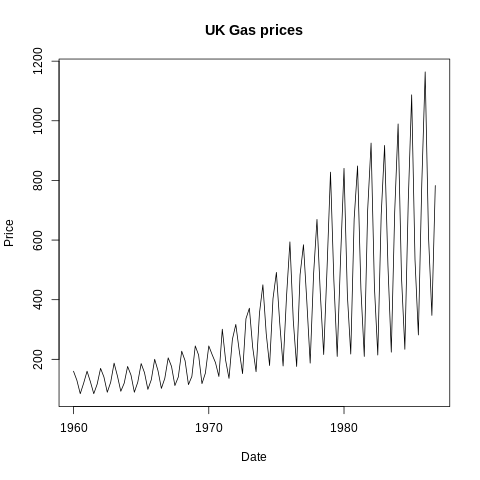

In [ ]:
%%R
################## Part (1) ##############################
# Read the data and plot.
UKGas_data <- read_excel("/content/drive/MyDrive/STAT619 - Time series analysis /HW_M3_UKgas_S.xlsx",
                         col_names = c('DatesQ', "Prices"), skip = 1)

#Convert the quarter dates to Date object
data_Quarters <- UKGas_data$DatesQ
UKGas_data$Date <- as.Date(as.yearqtr(data_Quarters))

plot(x = UKGas_data$Date, y = UKGas_data$Prices, type='l', xlab='Date',
     ylab='Price', main = 'UK Gas prices')

# Convert the prices to a time series object
UKGas_ts <- ts(UKGas_data$Prices,
               start=c(year(min(UKGas_data$Date)),
                       quarter(min(UKGas_data$Date))), frequency=4)

2. Apply the Simple Exponential Smoothing (SES) to the dataset and forecast gas consumption for the next 8 quarters. Plot the forecasted values along with the historical data. Interpret the results briefly.

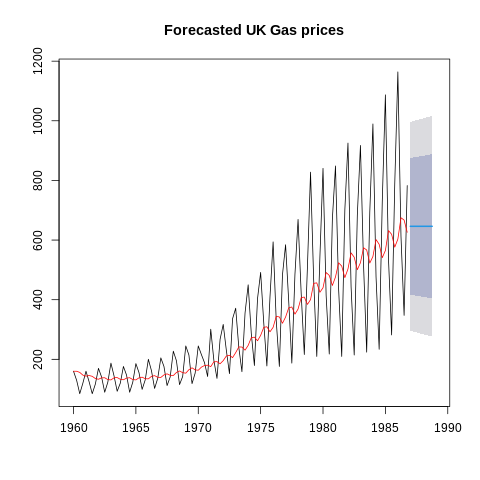

In [ ]:
%%R
################### Part (2) ##############################
# Apply the Simple Exponential Smoothing (SES) to the dataset and
# forecast gas consumption for the next 8 quarters.
# Plot the forecasted values along with the historical data.
# Interpret the results briefly


# Fit the model on the time series object
ses_fit <- ses(UKGas_ts, alpha = NULL, initial = "simple")

ses_forecast <- forecast(ses_fit, h = 8, level = c(80,95))

# Plot the forecasted values along with the historical data
plot(ses_forecast, main = 'Forecasted UK Gas prices', xlim = c(1960, 1989))
lines(ses_fit$fitted, col='red')

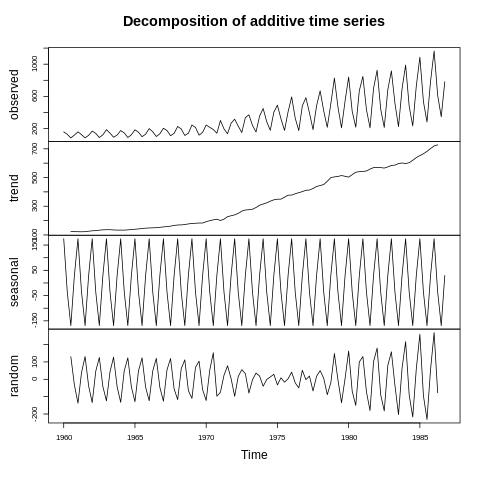

In [ ]:
%%R
# The simple exponential smoothing and the forecast shows a significant
# level of uncertainty.

# We can decompose the time series to check the components and see, why a
# simple exponnetial smotthing is not an ideal choice.
UKGas_components <- decompose(UKGas_ts)
plot(UKGas_components)

# The best way to use SES is if the time series has no trend,
# and no seasonal pattern.
# However, from the decomposition it is clear that UK gas time sereis has both.

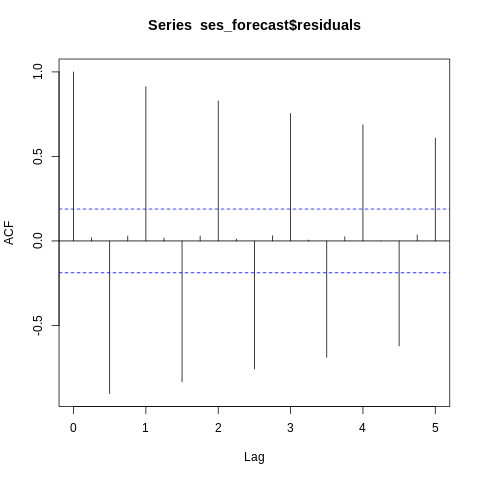

In [ ]:
%%R
# Check the residuals
acf(ses_forecast$residuals, lag=20, na.action=na.pass)

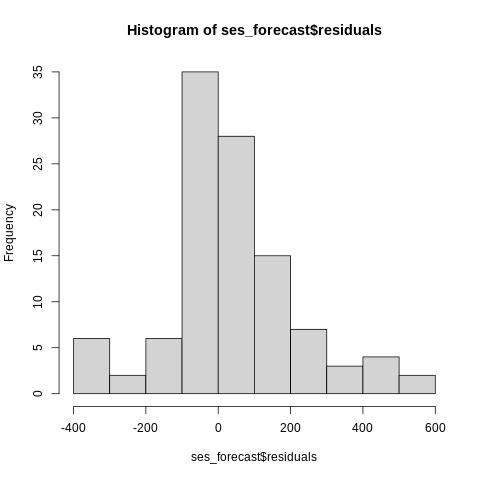

In [ ]:
%%R
Box.test(ses_forecast$residuals, lag=20, type="Ljung-Box")
hist(ses_forecast$residuals)

In [ ]:
%%R
Box.test(ses_forecast$residuals, lag=20, type="Ljung-Box")

# Box-Ljung test

# data:  ses_forecast$residuals
# X-squared = 711.69, df = 20, p-value < 2.2e-16


	Box-Ljung test

data:  ses_forecast$residuals
X-squared = 711.69, df = 20, p-value < 2.2e-16



3. Apply Holt-Winters’ Seasonal Method with additive seasonality to the dataset and forecast gas consumption for the next 8 quarters. Plot the forecasted values along with the historical data. Interpret.

In [ ]:
%%R
################### Part (3) ##############################
# Apply Holt-Winters’ Seasonal Method with additive seasonality to the dataset.
# Forecast gas consumption for the next 8 quarters.
# Plot the forecasted values along with the historical data.
# Interpret.

holt_fit_additive <- HoltWinters(UKGas_ts, seasonal = "add",
                                 optim.control = list(maxit = 1000))

# Forecast for the next 8 quarters
forecast_holt_add <- forecast(holt_fit_additive, h = 8, level= c(80,95))
forecast_holt_add

        Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
1987 Q1      1205.3876 1161.1854 1249.5899 1137.7861 1272.9891
1987 Q2       654.1654  609.9231  698.4076  586.5027  721.8281
1987 Q3       387.6259  343.2937  431.9580  319.8257  455.4260
1987 Q4       823.7498  779.2584  868.2413  755.7060  891.7936
1988 Q1      1245.8733 1180.7705 1310.9760 1146.3072 1345.4393
1988 Q2       694.6510  629.3042  759.9979  594.7117  794.5904
1988 Q3       428.1115  362.4339  493.7891  327.6663  528.5568
1988 Q4       864.2355  798.1283  930.3427  763.1333  965.3377


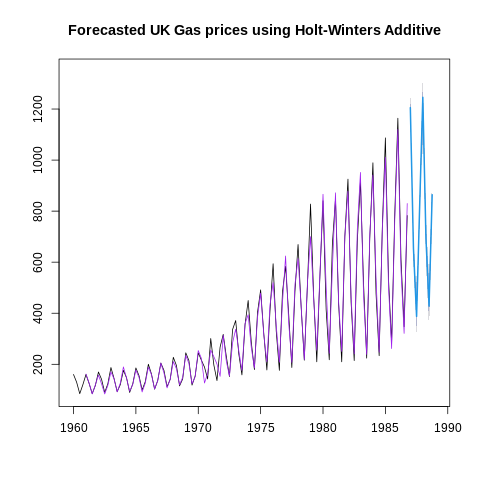

In [ ]:
%%R
# Plot the forecasted values along with the historical data
plot(forecast_holt_add, xlim = c(1960, 1989),
     main = 'Forecasted UK Gas prices using Holt-Winters Additive')
lines(forecast_holt_add$fitted, col='purple')

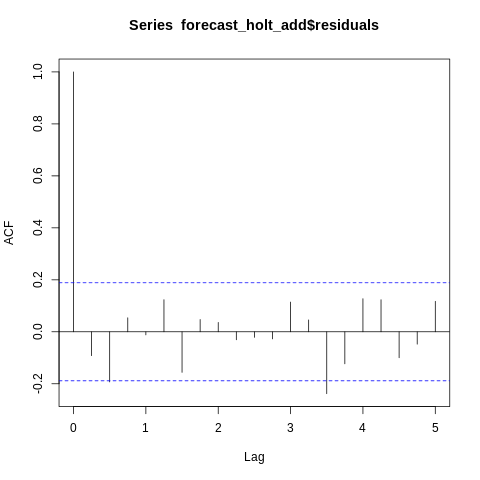

In [ ]:
%%R
# Check the residuals
acf(forecast_holt_add$residuals, lag.max=20, na.action=na.pass)

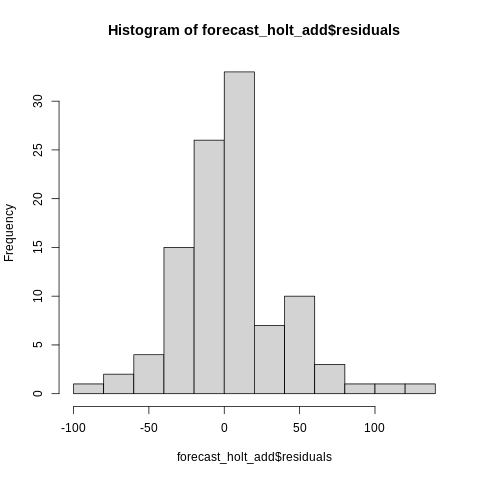

In [ ]:
%%R
hist(forecast_holt_add$residuals)

In [ ]:
%%R
Box.test(forecast_holt_add$residuals, lag=20, type="Ljung-Box")

# Box-Ljung test

# data:  forecast_holt_add$residuals
# X-squared = 28.358, df = 20, p-value = 0.1012


	Box-Ljung test

data:  forecast_holt_add$residuals
X-squared = 28.358, df = 20, p-value = 0.1012



Since the dataset has both trend and seasonal pattern, the Holt-Winters method should give us a good result and based on the acf plot and the residuals histogram, and the Box-Ljung test also gives good result, which means the HW additive model is good for the dataset.

4. Apply the Holt-Winters’ Seasonal Method with multiplicative seasonality to the dataset and forecast gas consumption for the next 8 quarters. Plot the forecasted values along with the historical data. Interpret.



In [ ]:
%%R
############# Part 4  ################################
# Apply the Holt-Winters’ Seasonal Method with multiplicative seasonality
#to the dataset and forecast gas consumption for the next 8 quarters.
# Plot the forecasted values along with the historical data.
# Interpret.

# Try specifying a different optimization method
holt_fit_mult <- HoltWinters(UKGas_ts, seasonal = "mult",
                             optim.control = list(maxit = 1000))

# Forecast for the next 8 quarters
forecast_values_holt_mult <- forecast(holt_fit_mult, h = 8)
forecast_values_holt_mult

        Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
1987 Q1      1251.0258 1218.4552 1283.5964 1201.2133 1300.8383
1987 Q2       651.7494  619.1628  684.3360  601.9125  701.5863
1987 Q3       362.1424  329.5429  394.7418  312.2858  411.9990
1987 Q4       857.5545  849.3037  865.8053  844.9360  870.1730
1988 Q1      1346.0803 1295.3497 1396.8110 1268.4945 1423.6661
1988 Q2       700.3470  650.7342  749.9599  624.4707  776.2233
1988 Q3       388.6513  339.5206  437.7820  313.5124  463.7902
1988 Q4       919.1997  899.2267  939.1727  888.6536  949.7458


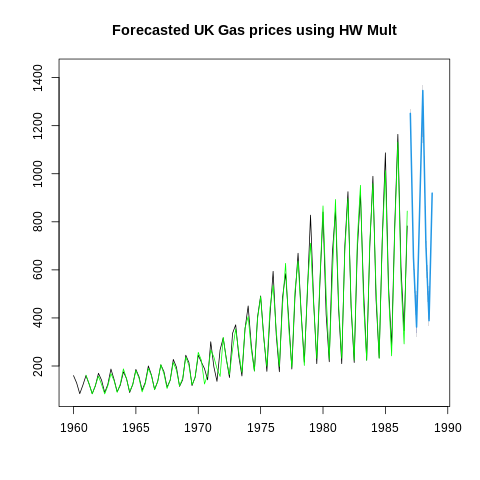

In [ ]:
%%R
# Plot the forecasted values along with the historical data
plot(forecast_values_holt_mult, main = 'Forecasted UK Gas prices using HW Mult',
     xlim = c(1960, 1989))
lines(forecast_values_holt_mult$fitted, col='green')

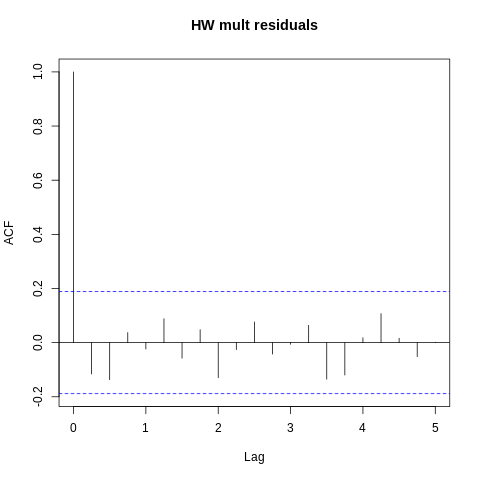

In [ ]:
%%R
# Check the residuals
acf(forecast_values_holt_mult$residuals, lag.max=20, na.action=na.pass,
    main = 'HW mult residuals')

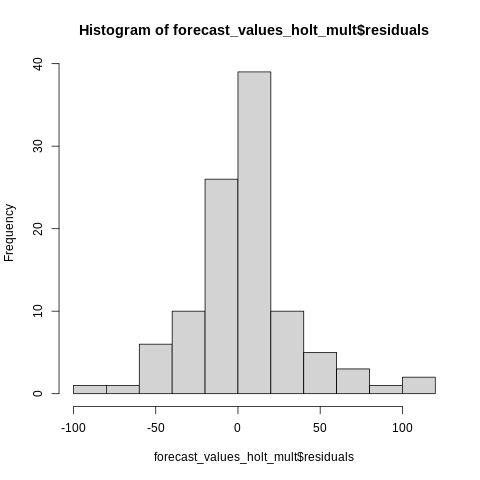

In [ ]:
%%R
hist(forecast_values_holt_mult$residuals)

In [ ]:
%%R
Box.test(forecast_values_holt_mult$residuals, lag=20, type="Ljung-Box")

# Box-Ljung test

# data:  forecast_values_holt_mult$residuals
# X-squared = 14.491, df = 20, p-value = 0.8048


	Box-Ljung test

data:  forecast_values_holt_mult$residuals
X-squared = 14.491, df = 20, p-value = 0.8048



The HW multiplicative, also looks to be a good model for the data based on the acf plot and the residuals histogram, and the Box-Ljung test also gives good result, which means the model is good for the data.

Both models appear to be decent fits for the UK gas data.

However, we need to compare both and pick one.

5. Which do you think is the best forecast model for this dataset? Explain.

In [ ]:
%%R
############ Part 5   ################################
# Which do you think is the best forecast model for this dataset?
# Explain.

For the HW Add model, the p-value is 0.1012. This is greater than 0.05, so we would not reject the null hypothesis. This means that the residuals from the HW Add model do not exhibit significant autocorrelation.

For the HW Mult model, the p-value is 0.8048. This is also greater than 0.05, so we would not reject the null hypothesis. This means that the residuals from the HW Mult model do not exhibit significant autocorrelation.

However, comparing, the HW Mult model has a higher p-value (0.8048 vs 0.1012), which means that the residuals are less likely to exhibit autocorrelation.
So, based on the Box-Ljung test results, the HW Mult model would be the preferred choice.

In [ ]:
!jupyter nbconvert --to html /content/STAT619_HW3_Juan_Guzman.ipynb

[NbConvertApp] Converting notebook /content/STAT619_HW3_Juan_Guzman.ipynb to html
[NbConvertApp] Writing 900305 bytes to /content/STAT619_HW3_Juan_Guzman.html
